Problem Statement

● A sizable department has to be maintained, for the purposes of recruiting new talent.

● More often than not, the new employees have to be trained for the job and/or given time to acclimatize themselves to the company.

● Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition.

● In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay.

● Also, they want to know which of these variables is most important and needs to be addressed right away.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("general_data.csv")
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [3]:
# Removing null values
dataset = dataset.dropna()
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [4]:
# Removing duplicated rows
dataset = dataset.drop_duplicates()

In [5]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
dataset.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4404   29        No      Travel_Rarely                   Sales   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1              

In [7]:
dataset1 = dataset

In [8]:
dataset1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

- Computing mean of selected elements

In [9]:
dataset1[["Age","DistanceFromHome","JobLevel","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]].mean()

Age                           36.933364
DistanceFromHome               9.198996
JobLevel                       2.063898
MonthlyIncome              65061.702419
NumCompaniesWorked             2.693291
PercentSalaryHike             15.210634
StockOptionLevel               0.794614
TotalWorkingYears             11.290278
TrainingTimesLastYear          2.798266
YearsAtCompany                 7.010497
YearsSinceLastPromotion        2.191693
YearsWithCurrManager           4.126198
dtype: float64

- Computing median of selected elements

In [10]:
dataset1[["Age","DistanceFromHome","JobLevel","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]].median()

Age                           36.0
DistanceFromHome               7.0
JobLevel                       2.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

- Computing mode of selected elements

In [11]:
dataset1[["Age","DistanceFromHome","JobLevel","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]].mode()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,1,23420,1.0,11,0,10.0,2,5,0,2


- Computing skewness of selected elements

In [12]:
dataset1[["Age","DistanceFromHome","JobLevel","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]].skew()

Age                        0.413048
DistanceFromHome           0.955517
JobLevel                   1.021797
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
StockOptionLevel           0.967263
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

- Computing kurtosis of selected elements

In [13]:
dataset1[["Age","DistanceFromHome","JobLevel","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]].kurt()

Age                       -0.409517
DistanceFromHome          -0.230691
JobLevel                   0.388189
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
StockOptionLevel           0.356755
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

> From above kurtosis it is clear that data is not normally distributed. So we use Non-Parametric Tests

- Here now we try to check for outliers

In [14]:
dataset1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Age:


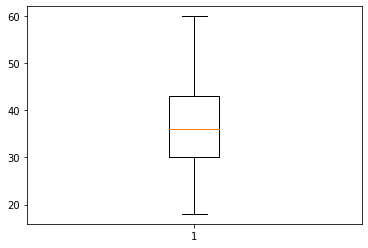

DistanceFromHome:


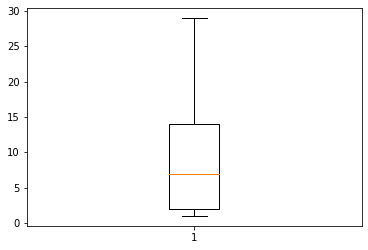

JobLevel:


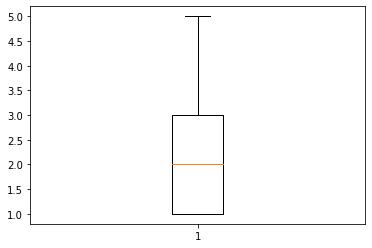

MonthlyIncome:


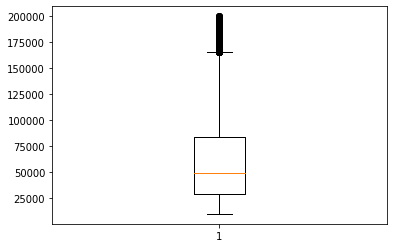

NumCompaniesWorked:


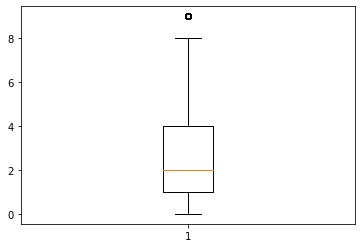

PercentSalaryHike:


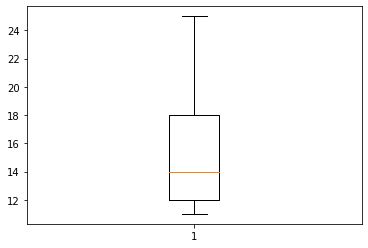

StockOptionLevel:


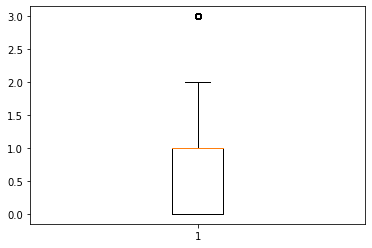

TotalWorkingYears:


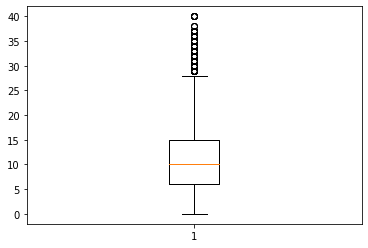

TrainingTimesLastYear:


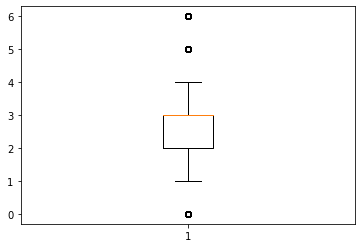

YearsAtCompany:


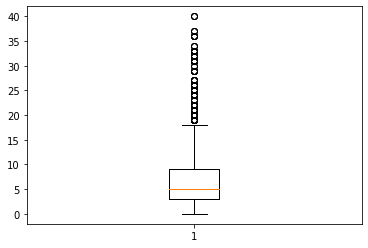

YearsSinceLastPromotion:


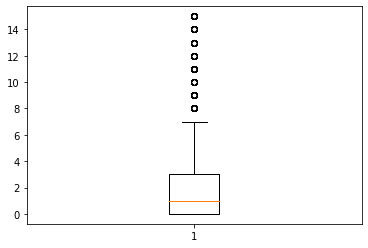

YearsWithCurrManager:


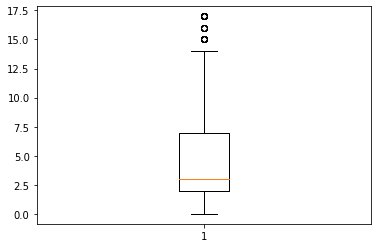

In [15]:
plt.boxplot(dataset1['Age'])
print("Age:")
plt.show()
plt.boxplot(dataset1['DistanceFromHome'])
print("DistanceFromHome:")
plt.show()
plt.boxplot(dataset1['JobLevel'])
print("JobLevel:")
plt.show()
plt.boxplot(dataset1['MonthlyIncome'])
print("MonthlyIncome:")
plt.show()
plt.boxplot(dataset1['NumCompaniesWorked'])
print("NumCompaniesWorked:")
plt.show()
plt.boxplot(dataset1['PercentSalaryHike'])
print("PercentSalaryHike:")
plt.show()
plt.boxplot(dataset1['StockOptionLevel'])
print("StockOptionLevel:")
plt.show()
plt.boxplot(dataset1['TotalWorkingYears'])
print("TotalWorkingYears:")
plt.show()
plt.boxplot(dataset1['TrainingTimesLastYear'])
print("TrainingTimesLastYear:")
plt.show()
plt.boxplot(dataset1['YearsAtCompany'])
print("YearsAtCompany:")
plt.show()
plt.boxplot(dataset1['YearsSinceLastPromotion'])
print("YearsSinceLastPromotion:")
plt.show()
plt.boxplot(dataset1['YearsWithCurrManager'])
print("YearsWithCurrManager:")
plt.show()

> Inferences from above Boxplot
1. Age is approximately normally distributed and has no outliers
2. DistanceFromHome not normally distributed and has no outliers
3. JobLevel is approximately normally distributed and has no outliers
4. MonthlyIncome is not normally distributed with many outliers
5. NumCompaniesWorked is not normally distributed with one outlier
6. PercentSalaryHike is not normally distributed with no outliers
7. StockOptionLevel is not normally distributed with one outliers
8. TotalWorkingYears is normally distributed with many outliers
9. TrainingTimesLastYear is not normally distributed with few outliers
10. YearsAtCompany is not normally distributed with many outliers
11. YearsSinceLastPromotion is not normally distributed with many outliers
12. YearsWithCurrManager is not normally distributed with few outliers

In [16]:
dataset_Yes = dataset[dataset["Attrition"] == "Yes"]
dataset_Yes

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9
28,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,...,3.0,Y,14,8,1,19.0,2,1,0,0
30,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,...,2.0,Y,11,8,0,5.0,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,Yes,Travel_Rarely,Research & Development,7,1,Life Sciences,1,4382,Female,...,1.0,Y,21,8,0,4.0,2,4,0,1
4386,33,Yes,Travel_Rarely,Sales,11,4,Marketing,1,4387,Male,...,5.0,Y,21,8,0,8.0,2,5,0,4
4388,33,Yes,Travel_Rarely,Sales,1,3,Life Sciences,1,4389,Male,...,7.0,Y,11,8,0,13.0,2,9,1,7
4391,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,1,4392,Male,...,0.0,Y,11,8,0,4.0,2,3,1,2


In [17]:
dataset_No = dataset[dataset["Attrition"] == "No"]
dataset_No

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [18]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

> Continuous Variables
- Age,
- DistanceFromHome,
- MonthlyIncome,
- NumCompaniesWorked,
- PercentSalaryHike,
- TotalWorkingYears,
- TrainingTimesLastYear,
- YearsAtCompany,
- YearsSinceLastPromotion,
- YearsWithCurrManager,


Hypothesis(H0) :-
- 1. There is no significance difference btw age(Attrition==Yes) and age(Attrition==No)
- 2. There is no significance difference btw DistanceFromHomee(Attrition==Yes) and age(Attrition==No)
- 3. There is no significance difference btw MonthlyIncome(Attrition==Yes) and age(Attrition==No)
- 4. There is no significance difference btw NumCompaniesWorked(Attrition==Yes) and age(Attrition==No)
- 5. There is no significance difference btw PercentSalaryHike(Attrition==Yes) and age(Attrition==No)
- 6. There is no significance difference btw TotalWorkingYears(Attrition==Yes) and age(Attrition==No)
- 7. There is no significance difference btw TrainingTimesLastYear(Attrition==Yes) and age(Attrition==No)
- 8. There is no significance difference btw YearsAtCompany(Attrition==Yes) and age(Attrition==No)
- 9. There is no significance difference btw NumCompaniesWorked(Attrition==Yes) and age(Attrition==No)
- 10. There is no significance difference btw YearsSinceLastPromotion(Attrition==Yes) and age(Attrition==No)

Alternative Hypothesis :-
- There is significance difference in all above hypothesis

In [19]:
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
# Here wilcoxon and friedman tests can't be used since people in attrition yes and no document are not same

# Now we compare attrition with all independent variables

In [20]:
from scipy.stats import mannwhitneyu

In [21]:
stat1,p1 = mannwhitneyu(dataset_Yes.Age,dataset_No.Age)
print("For Age: ",end="")
print(stat1,p1,end="\n\n")

stat2,p2 = mannwhitneyu(dataset_Yes.DistanceFromHome,dataset_No.DistanceFromHome)
print("For DistanceFromHome: ",end="")
print(stat2,p2,end="\n\n")

stat3,p3 = mannwhitneyu(dataset_Yes.MonthlyIncome,dataset_No.MonthlyIncome)
print("For MonthlyIncome: ",end="")
print(stat3,p3,end="\n\n")

stat4,p4 = mannwhitneyu(dataset_Yes.NumCompaniesWorked,dataset_No.NumCompaniesWorked)
print("For NumCompaniesWorked: ",end="")
print(stat4,p4,end="\n\n")

stat5,p5 = mannwhitneyu(dataset_Yes.PercentSalaryHike,dataset_No.PercentSalaryHike)
print("For PercentSalaryHike: ",end="")
print(stat5,p5,end="\n\n")

stat6,p6 = mannwhitneyu(dataset_Yes.TotalWorkingYears,dataset_No.TotalWorkingYears)
print("For TotalWorkingYears: ",end="")
print(stat6,p6,end="\n\n")

stat7,p7 = mannwhitneyu(dataset_Yes.TrainingTimesLastYear,dataset_No.TrainingTimesLastYear)
print("For TrainingTimesLastYear: ",end="")
print(stat7,p7,end="\n\n")

stat8,p8 = mannwhitneyu(dataset_Yes.YearsAtCompany,dataset_No.YearsAtCompany)
print("For YearsAtCompany: ",end="")
print(stat8,p8,end="\n\n")

stat9,p9 = mannwhitneyu(dataset_Yes.NumCompaniesWorked,dataset_No.NumCompaniesWorked)
print("For NumCompaniesWorked: ",end="")
print(stat9,p9,end="\n\n")

stat10,p10 = mannwhitneyu(dataset_Yes.YearsSinceLastPromotion,dataset_No.YearsSinceLastPromotion)
print("For YearsSinceLastPromotion: ",end="")
print(stat10,p10)

For Age: 949178.0 7.98668614365882e-30

For DistanceFromHome: 1295261.0 0.488538986087403

For MonthlyIncome: 1249573.5 0.06508807631576838

For NumCompaniesWorked: 1238814.5 0.02793197853866981

For PercentSalaryHike: 1231873.5 0.017810794960084964

For TotalWorkingYears: 895173.5 2.741211827689903e-39

For TrainingTimesLastYear: 1225582.0 0.008107344081224082

For YearsAtCompany: 912579.0 3.3433144809752036e-36

For NumCompaniesWorked: 1238814.5 0.02793197853866981

For YearsSinceLastPromotion: 1196606.0 0.00037904698157957496


 In printed statement second item is p
- if p < 0.05 reject Null hypothesis
- else accept Null hypothesis

# Inferences


 1. There is considerable significance difference btw Age and Attrition.
 2. There is no significant difference btw DistanceFromHome and Attrition.
 3. There is no significant difference btw MonthlyIncome and Attrition.
 4. There is considerable significance difference btw NumCompaniesWorked and Attrition.
 5. There is considerable significance difference btw PercentSalaryHike and Attrition.
 6. There is considerable significance difference btw TotalWorkingYears and Attrition.
 7. There is considerable significance difference btw TrainingTimesLastYear and Attrition.
 8. There is considerable significance difference btw YearsAtCompany and Attrition.
 9. There is considerable significance difference btw NumCompaniesWorked and Attrition.
 10. There is considerable significance difference btw YearsSinceLastPromotion and Attrition.

#  For categorical variables lets use ChiSquare Test

- For ChiSquare Test we use cross table and then that is given as input to chi2_contingency function

> Categorical Variables
- BusinessTravel,
- Department,
- Education,
- EducationField,
- StockOptionLevel,
- Gender,
- JobRole,
- JobLevel,

Hypothesis(H0) :-
- 1. There is no significant difference btw Attrition and BusinessTravel
- 2. There is no significant difference btw Attrition and Department
- 3. There is no significant difference btw Attrition and Education
- 4. There is no significant difference btw Attrition and EducationField
- 5. There is no significant difference btw Attrition and StockOptionLevel
- 6. There is no significant difference btw Attrition and Gender
- 7. There is no significant difference btw Attrition and JobRole
- 8. There is no significant difference btw Attrition and JobLevel

Alternative Hypothesis :-
- There is significance difference in all above hypothesis

In [22]:
dataset2 = dataset

In [23]:
from scipy.stats import chi2_contingency

In [24]:
crosstab1 = pd.crosstab(dataset2.Attrition,dataset2.BusinessTravel)
stat1,p1,dof1,expected1 = chi2_contingency(crosstab1)
print("BusinessTravel :",end="")
print(stat1,p1,end="\n\n")

crosstab2 = pd.crosstab(dataset2.Attrition,dataset2.Department)
stat2,p2,dof2,expected2 = chi2_contingency(crosstab2)
print("Department :",end="")
print(stat2,p2,end="\n\n")

crosstab3 = pd.crosstab(dataset2.Attrition,dataset2.Education)
stat3,p3,dof3,expected3 = chi2_contingency(crosstab3)
print("Education :",end="")
print(stat3,p3,end="\n\n")

crosstab4 = pd.crosstab(dataset2.Attrition,dataset2.EducationField)
stat4,p4,dof4,expected4 = chi2_contingency(crosstab4)
print("EducationField :",end="")
print(stat4,p4,end="\n\n")

crosstab5 = pd.crosstab(dataset2.Attrition,dataset2.StockOptionLevel)
stat5,p5,dof5,expected5 = chi2_contingency(crosstab1)
print("StockOptionLevel :",end="")
print(stat5,p5,end="\n\n")

crosstab6 = pd.crosstab(dataset2.Attrition,dataset2.Gender)
stat6,p6,dof6,expected6 = chi2_contingency(crosstab3)
print("Gender :",end="")
print(stat6,p6,end="\n\n")

crosstab7 = pd.crosstab(dataset2.Attrition,dataset2.JobRole)
stat7,p7,dof7,expected7 = chi2_contingency(crosstab4)
print("JobRole :",end="")
print(stat7,p7,end="\n\n")

crosstab8 = pd.crosstab(dataset2.Attrition,dataset2.JobLevel)
stat8,p8,dof8,expected8 = chi2_contingency(crosstab1)
print("JobLevel :",end="")
print(stat8,p8,end="\n\n")

BusinessTravel :70.07594084831366 6.07019702736392e-16

Department :25.89432541916022 2.382970570769315e-06

Education :6.2735361781270615 0.17963050984273224

EducationField :43.132860148900384 3.472896220587872e-08

StockOptionLevel :70.07594084831366 6.07019702736392e-16

Gender :6.2735361781270615 0.17963050984273224

JobRole :43.132860148900384 3.472896220587872e-08

JobLevel :70.07594084831366 6.07019702736392e-16



In [25]:
# This is how crosstab looks
crosstab1

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,412,621,2644
Yes,36,204,465


 In printed statement second item is p
- if p < 0.05 reject Null hypothesis
- else accept Null hypothesis

# Inferences

 1. There is considerable significance difference btw BusinessTravel and Attrition.
 2. There is considerable significance difference btw Department and Attrition.
 3. There is no significant difference btw Education and Attrition.
 4. There is considerable significance difference btw EducationField and Attrition.
 5. There is considerable significance difference btw StockOptionLevel and Attrition.
 6. There is no significant difference btw Gender and Attrition.
 7. There is considerable significance difference btw JobRole and Attrition.
 8. There is considerable significance difference btw JobLevel and Attrition.